#                                           **Financial Risk Assessment Model**


## **Name:** REENA

  ## **Organization:** Entri Elevate

  ## **Date:** : 2-09-2024



### Introduction to Dataset
The Financial Risk Assessment Dataset offers comprehensive insights into individual financial profiles. It encompasses demographic, financial, and behavioral data to evaluate financial risk. The dataset includes diverse columns like income, credit score, and risk rating, with deliberate imbalances and missing values to mirror real-world conditions.

### Objective
The primary objective of this project is to develop a predictive model that accurately assesses the financial risk of clients. The model should help in identifying high-risk clients, thus enabling the institution to make informed decisions regarding loans, investments, and other financial activities.

### Data Description
The dataset includes a variety of features that may impact financial risk, such as:
- **Client Information**
- Age                 : The individual's age in years.
- Gender              : The individual's gender. Non-binary describes a gender identity that doesn't fit the traditional male or female categories.
- Education Level     : The highest level of education attained by the individual.
- Marital Status      : The current marital status of the individual.
- Employment Status   : The current employment status of the individual.
- Years at Current Job: The number of years the individual has been employed at their current job.
- Number of Dependents: The count of individuals who rely on the primary individual for financial support.
- City                : The city where the individual resides.
- State               : The state where the individual resides.
- Country             : The country where the individual resides.
- Marital Status Change: Indicates whether and how an individual's marital status has changed, with 0 for no change, 1 for single                                                   to married, and 2 for married to divorced.

- **Transaction History**
- Payment History      : The record of the individual's past payments on credit accounts.
- **Financial Products**
- Credit Score         : A numerical representation of the individual's creditworthiness.
- Loan Amount          : The total amount of money borrowed by the individual.
- Loan Purpose         : The reason for which the loan was taken.
- Assets Value         : The total monetary value of all assets owned by the individual.
- Previous Defaults    : The number of times an individual has previously defaulted on a financial obligation.
- **Economic Indicators**
- Income               : The annual income of the individual.
- Debt-to-Income Ratio : The ratio of the individual's monthly debt payments to their monthly gross income.
- Risk Rating          : A numerical or categorical assessment of the individual's financial risk level.
  
### Goals
1. **Data Exploration and Preprocessing**:
   - Understand the dataset by performing exploratory data analysis (EDA) to identify patterns, trends, and anomalies.
   - Clean the dataset by handling missing values, outliers, and inconsistencies.
   - Transform the data by encoding categorical variables, normalizing/standardizing numerical variables, and creating new features if necessary.

2. **Feature Selection**:
   - Identify the most relevant features that significantly impact financial risk prediction.
   - Reduce dimensionality to enhance model performance and interpretability.

3. **Model Development**:
   - Train various machine learning models such as logistic regression, decision trees, random forests, gradient boosting, and neural networks.
   - Evaluate the models using appropriate metrics like accuracy, precision, recall, F1-score, ROC-AUC, etc.
   - Select the best-performing model based on evaluation metrics and validation techniques.

4. **Model Interpretation**:
   - Interpret the model’s predictions to understand the factors contributing to financial risk.
   - Use techniques like feature importance, SHAP values, or LIME to provide insights into the model’s decision-making process.

5. **Deployment**:
   - Develop a user-friendly interface or dashboard for financial analysts to input new data and receive risk predictions.
   - Ensure the model is scalable and can handle real-time data inputs for continuous risk assessment.

6. **Documentation and Reporting**:
   - Document the entire process, including data exploration, preprocessing steps, model development, and evaluation.
   - Prepare a comprehensive report that highlights key findings, model performance, and actionable insights for stakeholders.

### Expected Outcomes
- A robust predictive model that accurately assesses financial risk.
- Improved decision-making capabilities for financial institutions regarding loans, investments, and client management.
- Enhanced understanding of the factors influencing financial risk and potential areas for risk mitigation.

### Challenges
- Ensuring data quality and completeness for accurate model training.
- Balancing model complexity and interpretability to provide meaningful insights.
- Addressing potential biases in the data to avoid unfair risk assessments.

### Conclusion
The successful completion of this project will provide a valuable tool for financial institutions to manage risk effectively. It will contribute to more informed decision-making processes, ultimately leading to reduced financial losses and increased stability in financial operations.


## Data Source

You can use easily download the dataset using this link
'https://raw.githubusercontent.com/reenanv89/Datasets/main/Financial_risk.csv'

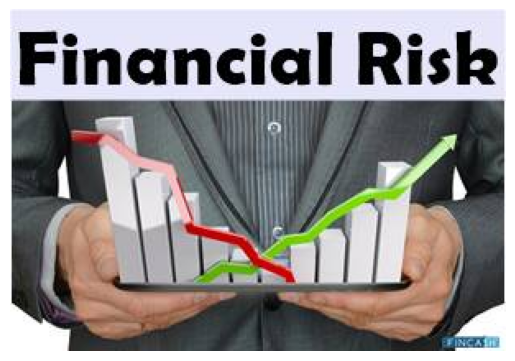

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Display the image
plt.imshow(Image.open('/content/FinancialRiskjpg-(1).jpeg'))
plt.axis('off')  # Turn off axis
plt.show()

## Importing necessary libraries and loading the dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/reenanv89/Datasets/main/Financial_risk.csv')

In [ ]:
#prints first 5 rows
data.head()

Age      Gender Education Level Marital Status   Income  Credit Score  \
0   49        Male             PhD       Divorced  72799.0         688.0   
1   57      Female      Bachelor's        Widowed      NaN         690.0   
2   21  Non-binary        Master's         Single  55687.0         600.0   
3   59        Male      Bachelor's         Single  26508.0         622.0   
4   25  Non-binary      Bachelor's        Widowed  49427.0         766.0   

   Loan Amount Loan Purpose Employment Status  Years at Current Job  \
0      45713.0     Business        Unemployed                    19   
1      33835.0         Auto          Employed                     6   
2      36623.0         Home          Employed                     8   
3      26541.0     Personal        Unemployed                     2   
4      36528.0     Personal        Unemployed                    10   

  Payment History  Debt-to-Income Ratio  Assets Value  Number of Dependents  \
0            Poor              0.154313      120228.0                   0.0   
1            Fair              0.148920       55849.0                   0.0   
2            Fair              0.362398      180700.0                   3.0   
3       Excellent              0.454964      157319.0                   3.0   
4            Fair              0.143242      287140.0                   NaN   

              City State       Country  Previous Defaults  \
0   Port Elizabeth    AS        Cyprus                2.0   
1  North Catherine    OH  Turkmenistan                3.0   
2      South Scott    OK    Luxembourg                3.0   
3       Robinhaven    PR        Uganda                4.0   
4      New Heather    IL       Namibia                3.0   

   Marital Status Change Risk Rating  
0                      2         Low  
1                      2      Medium  
2                      2      Medium  
3                      2      Medium  
4                      1         Low

## Features and Target variable

In [ ]:
# List the features
features = data.columns.tolist()
features.remove('Risk Rating')
print("Features in the dataset:")
for feature in features:
    print(feature)

# Identify the target variable
target = 'Risk rating'
print("\nTarget variable:")
print(target)

Features in the dataset:
Age
Gender
Education Level
Marital Status
Income
Credit Score
Loan Amount
Loan Purpose
Employment Status
Years at Current Job
Payment History
Debt-to-Income Ratio
Assets Value
Number of Dependents
City
State
Country
Previous Defaults
Marital Status Change

Target variable:
Risk rating


In [ ]:
data.shape

(15000, 20)

There are 15000 rows and 20 columns

Let’s get a quick summary of the dataset using the pandas describe() method. The describe() function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation, etc. Any missing value or NaN value is automatically skipped. describe() function gives a good picture of the distribution of data.

In [ ]:
data.describe()

Age         Income  Credit Score   Loan Amount  \
count  15000.000000   12750.000000  12750.000000  12750.000000   
mean      43.452667   69933.398510    699.109098  27450.010902   
std       14.910732   29163.626207     57.229465  12949.940135   
min       18.000000   20005.000000    600.000000   5000.000000   
25%       31.000000   44281.500000    650.000000  16352.500000   
50%       43.000000   69773.000000    699.000000  27544.000000   
75%       56.000000   95922.750000    748.000000  38547.500000   
max       69.000000  119997.000000    799.000000  49998.000000   

       Years at Current Job  Debt-to-Income Ratio   Assets Value  \
count          15000.000000          15000.000000   12750.000000   
mean               9.476267              0.350438  159741.497176   
std                5.769707              0.143919   80298.115832   
min                0.000000              0.100004   20055.000000   
25%                4.000000              0.227386   90635.250000   
50%                9.000000              0.350754  159362.000000   
75%               15.000000              0.476095  228707.000000   
max               19.000000              0.599970  299999.000000   

       Number of Dependents  Previous Defaults  Marital Status Change  
count           12750.00000       12750.000000           15000.000000  
mean                2.02651           1.992471               0.998467  
std                 1.41130           1.416909               0.813782  
min                 0.00000           0.000000               0.000000  
25%                 1.00000           1.000000               0.000000  
50%                 2.00000           2.000000               1.000000  
75%                 3.00000           3.000000               2.000000  
max                 4.00000           4.000000               2.000000

Note: we can also get the description of categorical columns of the dataset if we specify include =’all’ in the describe function.

Now, let’s also see the columns and their data types. For this, we will use the info() method.




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

### checking for duplicates

In [ ]:
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Age, Gender, Education Level, Marital Status, Income, Credit Score, Loan Amount, Loan Purpose, Employment Status, Years at Current Job, Payment History, Debt-to-Income Ratio, Assets Value, Number of Dependents, City, State, Country, Previous Defaults, Marital Status Change, Risk Rating]
Index: []


There are no duplicate rows in our DataFrame according to the criteria used by the data.duplicated() method. This indicates that every row in our DataFrame is unique.

In [ ]:
#count the number of unique values(cardinality) in each column
data.nunique()

Age                         52
Gender                       3
Education Level              4
Marital Status               4
Income                   11957
Credit Score               200
Loan Amount              11088
Loan Purpose                 4
Employment Status            3
Years at Current Job        20
Payment History              4
Debt-to-Income Ratio     15000
Assets Value             12470
Number of Dependents         5
City                     10614
State                       59
Country                    243
Previous Defaults            5
Marital Status Change        3
Risk Rating                  3
dtype: int64



We can see the number of unique elements in our dataset. This will help us in deciding which type of encoding to choose for converting categorical columns into numerical columns.


Till now we have got an idea about the dataset used. Now Let’s see if our dataset contains any missing values or not.

# Data preprocessing

In [ ]:
data.isnull().sum()

Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64

First lets a take a copy of our dataset as data_copy1


In [ ]:
data_copy1=data.copy()

### Handling Missing Value

In [ ]:
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
data[numerical_features].isnull().sum()

Age                         0
Income                   2250
Credit Score             2250
Loan Amount              2250
Years at Current Job        0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
Previous Defaults        2250
Marital Status Change       0
dtype: int64

In [ ]:
data[categorical_features].isnull().sum()

Gender               0
Education Level      0
Marital Status       0
Loan Purpose         0
Employment Status    0
Payment History      0
City                 0
State                0
Country              0
Risk Rating          0
dtype: int64

In our dataset, only numerical features contain null values .
There is no null values in categorical features.


In [ ]:
# Check for numerical columns with null values
num_nulls = [col for col in numerical_features if data[col].isnull().sum() > 0]

# Print the list of numerical columns with null values
print("Numerical columns with null values:", num_nulls)

Numerical columns with null values: ['Income', 'Credit Score', 'Loan Amount', 'Assets Value', 'Number of Dependents', 'Previous Defaults']


Lets replace  the null values in column  with the median of that particular column.

In [ ]:
for i in num_nulls:
  data[i].fillna(data[i].median(), inplace=True)

In [ ]:
data.isnull().sum()

Age                      0
Gender                   0
Education Level          0
Marital Status           0
Income                   0
Credit Score             0
Loan Amount              0
Loan Purpose             0
Employment Status        0
Years at Current Job     0
Payment History          0
Debt-to-Income Ratio     0
Assets Value             0
Number of Dependents     0
City                     0
State                    0
Country                  0
Previous Defaults        0
Marital Status Change    0
Risk Rating              0
dtype: int64

We can see that now there is no null values in or dataset.

## Calculating Statistical metrices and removing outliers

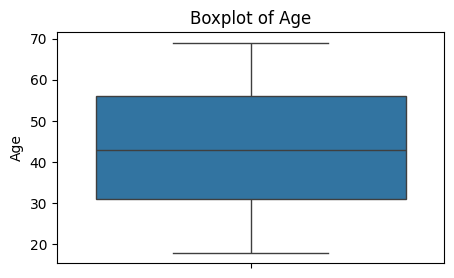

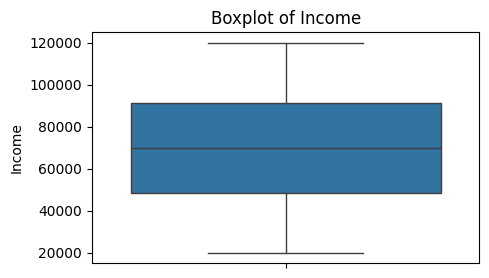

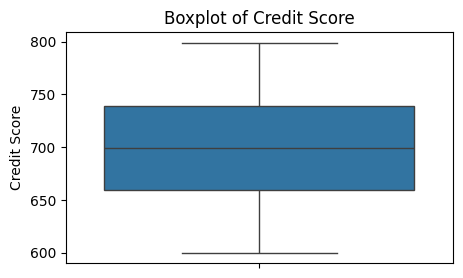

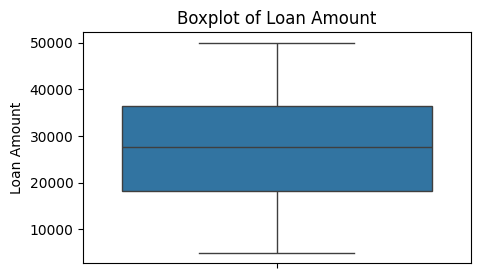

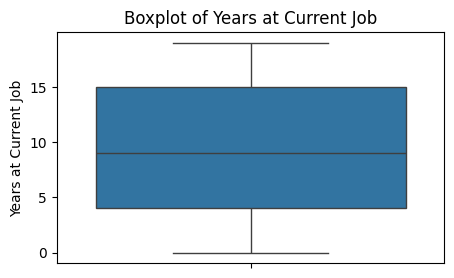

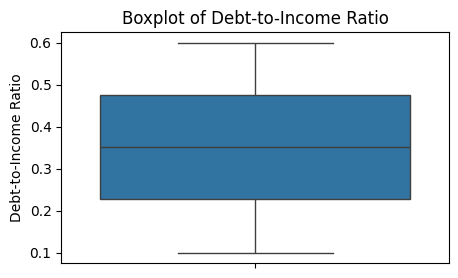

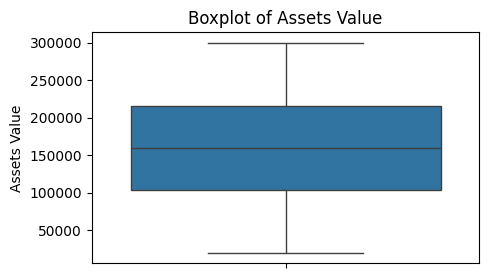

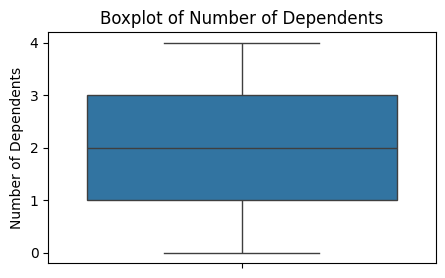

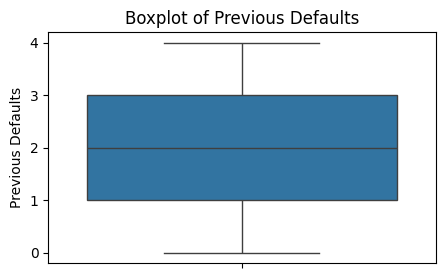

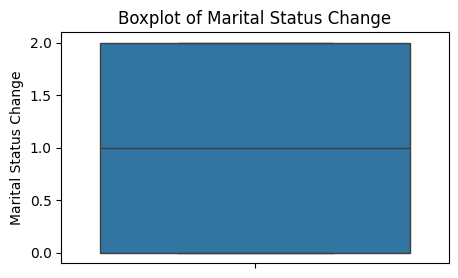

In [ ]:
#Plotting the distribution of numerical columns to visually identify outliers.
for column in numerical_features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [ ]:
# IQR method to statistically check for outliers.
Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR = Q3 - Q1

outliers = data[((data[numerical_features] < (Q1 - 1.5 * IQR)) | (data[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

if outliers.empty:
    print("No outliers detected in the dataset.")
else:
    print("Outliers detected in the dataset.")
    print(outliers)

No outliers detected in the dataset.




Since there is no outliers detected in our dataset there is no need of removing outliers. if there is outliers we can remove on the Interquartile Range (IQR) method.

data_cleaned = data[~((data[numerical_features] < (Q1 - 1.5 * IQR)) | (data[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]


# Exploratory data analysis (EDA)

Univariate analysis

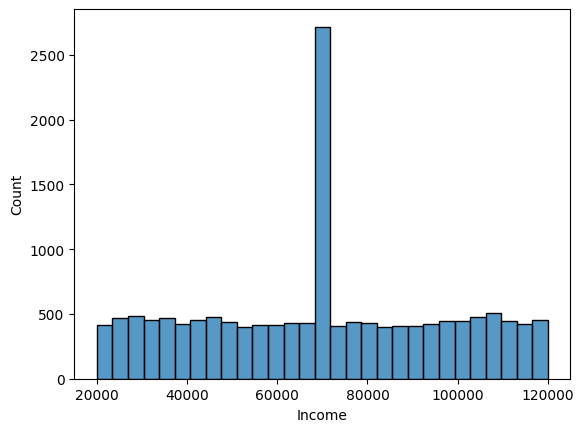

In [ ]:
sns.histplot(x='Income', data=data)
plt.show()


In [ ]:
income_range = data[(data['Income'] >= 65000) & (data['Income'] <= 75000)]
count = len(income_range)
total = len(data)
percentage = (count / total) * 100
print(f"Majority Income Range: There are {count} people with incomes ranging from 65000 to 75000, "
      f"which accounts for {percentage:.2f}% of the total population.")


Majority Income Range: There are 3507 people with incomes ranging from 65000 to 75000, which accounts for 23.38% of the total population.


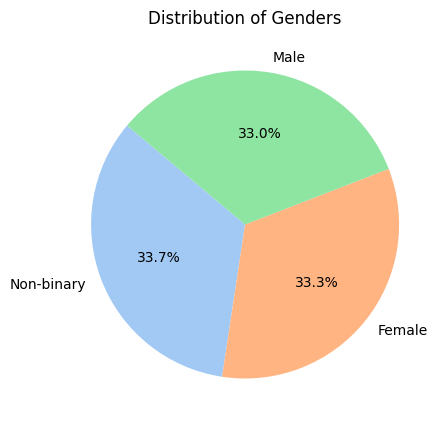

In [ ]:
# Count the occurrences of each category in the 'Gender' column
gender_counts = data['Gender'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))

# Add a title
plt.title('Distribution of Genders')

# Display the pie chart
plt.show()


Counts of Genders are almost equal

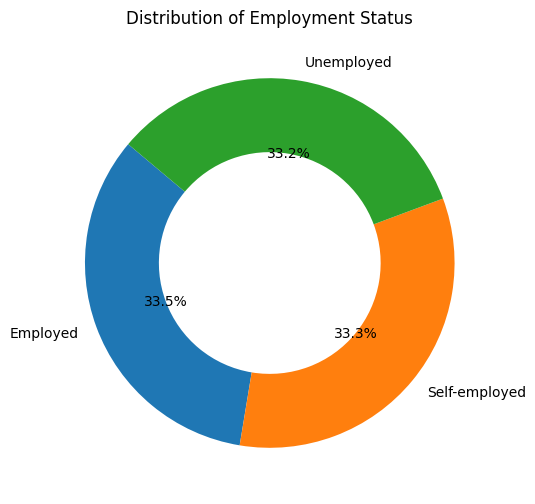

In [ ]:
# Donut chart for Employment Status
employment_status_counts = data['Employment Status'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(employment_status_counts, labels=employment_status_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.4})
plt.title('Distribution of Employment Status')

plt.show()

Equally distributed

Bivariate analysis

categorical vs Numerical

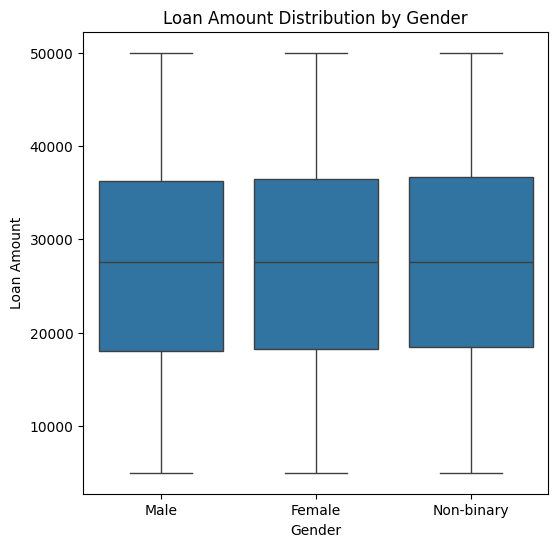

In [ ]:
# Create the boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(x="Gender", y="Loan Amount", data=data)
plt.title('Loan Amount Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Loan Amount')
plt.show()

 Similar loan amounts are being borrowed under gender category.

---



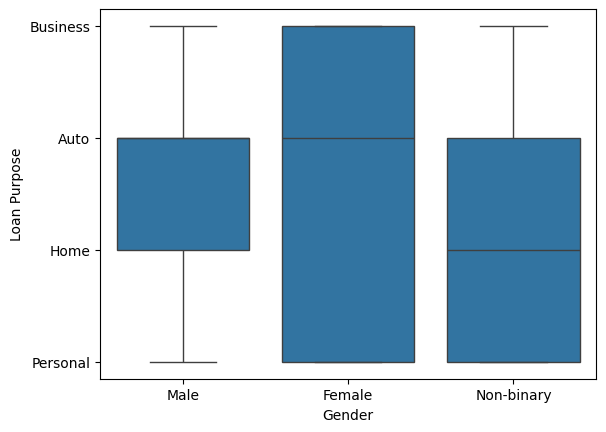

In [ ]:
sns.boxplot( x="Gender", y='Loan Purpose', data=data)
plt.show()

Gender-wise Loan Purpose Distribution:

    purpose of Male category to apply for loan are equal in numbers between Home and Auto.
    50% of female borrowers have taken loans for auto purposes.
    50% of non-binary borrowers have taken loans for home purposes.

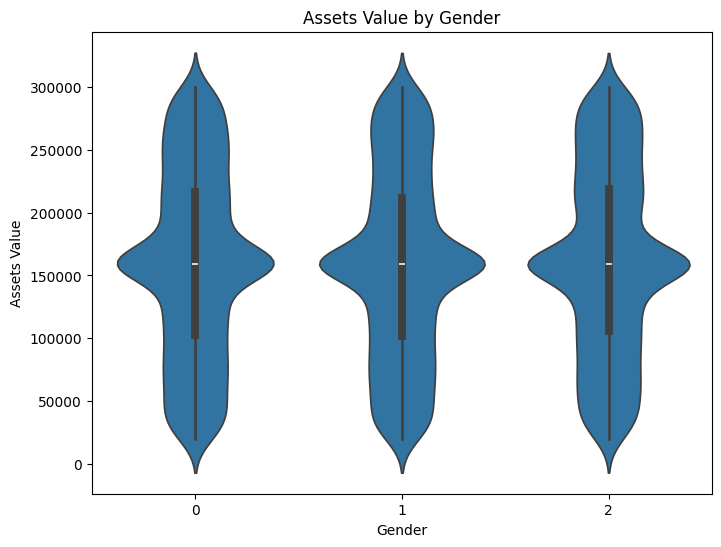

In [ ]:
# Violin plot for Assets Value by Gender
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Assets Value', data=data)
plt.title('Assets Value by Gender')
plt.xlabel('Gender')
plt.ylabel('Assets Value')
plt.show()

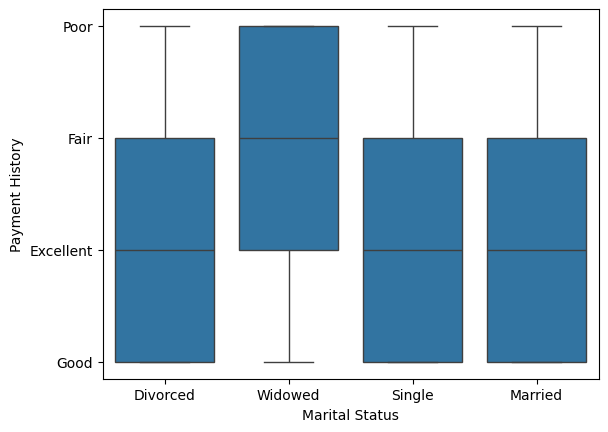

In [ ]:
sns.boxplot( x="Marital Status", y='Payment History', data=data)
plt.show()


"In analyzing payment history, it was observed that the majority of individuals in the widowed category maintain a fair record of loan payments. On the other hand, those who are single, married, or divorced exhibit an excellent track record in their payment history."

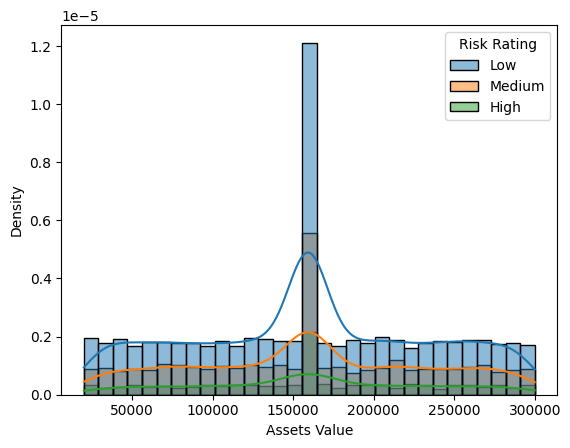

In [ ]:
sns.histplot(data,x="Assets Value",hue="Risk Rating",kde=True,stat="density")
plt.show()

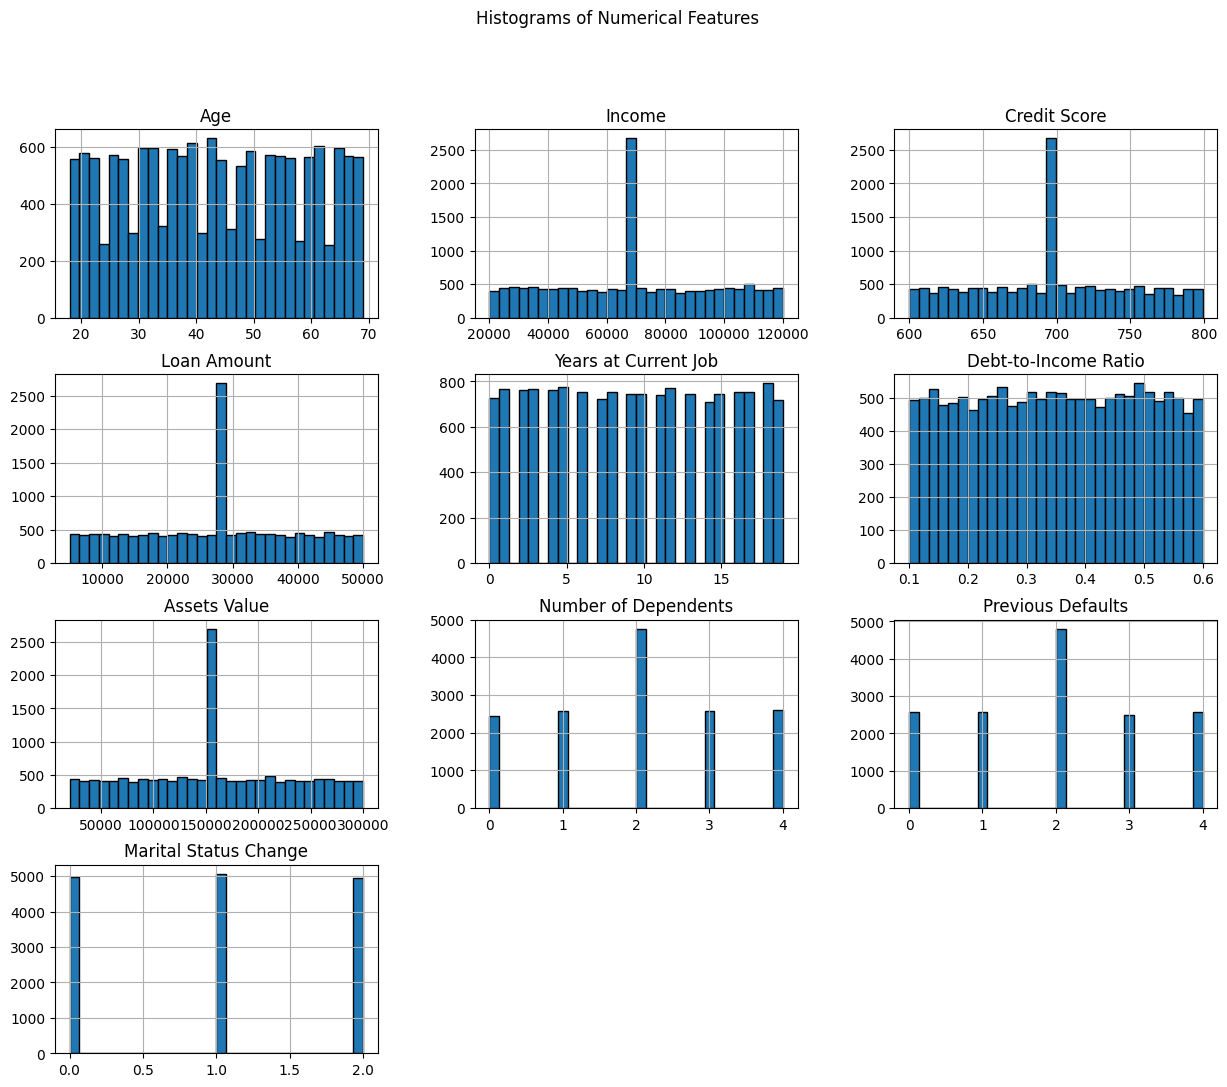

In [ ]:
data[numerical_features].hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

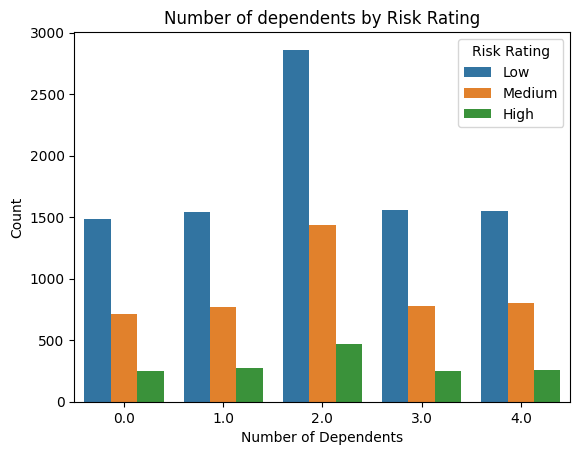

In [ ]:
# Churn rate by International plan
sns.countplot(x='Number of Dependents', hue='Risk Rating', data=data)
plt.title('Number of dependents by Risk Rating')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.show()

When Number of Depentdents increases Risk is Low

#Feature Engineering

### Checking the data balanced or not

In [ ]:
data['Risk Rating'].value_counts()

Risk Rating
Low       9000
Medium    4500
High      1500
Name: count, dtype: int64



As you can see the data distribution among low, Medium and High are not equal so this dataset is a Inbalanced dataset (as the number of data points for each lable is different).

Let us check visually using countplot


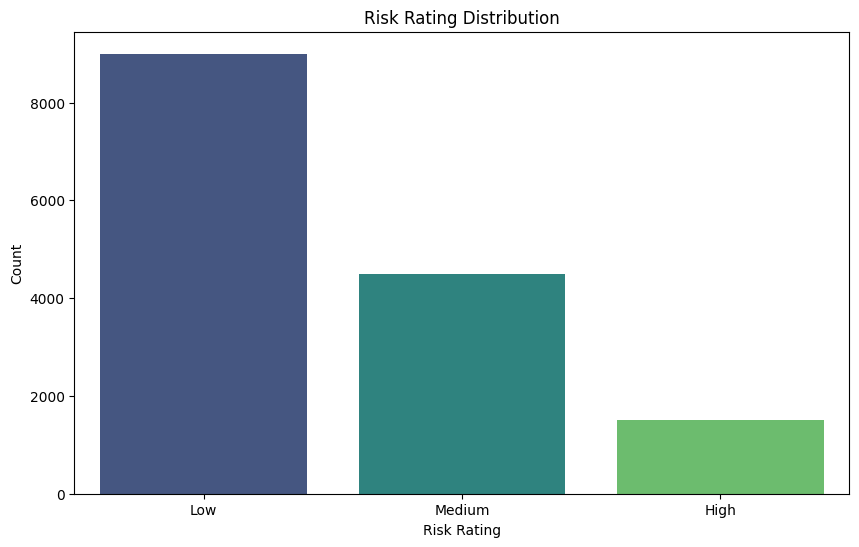

In [ ]:
# Plotting the graph
plt.figure(figsize=(10, 6))
sns.countplot(x='Risk Rating', data=data, palette='viridis')
plt.title('Risk Rating Distribution')
plt.xlabel('Risk Rating')
plt.ylabel('Count')
plt.show()

## Label Encoding and Balancing the data

In [ ]:
numerical_features

['Age',
 'Income',
 'Credit Score',
 'Loan Amount',
 'Years at Current Job',
 'Debt-to-Income Ratio',
 'Assets Value',
 'Number of Dependents',
 'Previous Defaults',
 'Marital Status Change']

In [ ]:
categorical_features

['Gender',
 'Education Level',
 'Marital Status',
 'Loan Purpose',
 'Employment Status',
 'Payment History',
 'City',
 'State',
 'Country',
 'Risk Rating']

In [ ]:

def encode_categorical_features(data, categorical_features):
    label_encoders = {}
    for feature in categorical_features:
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])
        label_encoders[feature] = le
    return data, label_encoders

encoded_data, label_encoders = encode_categorical_features(data, categorical_features)


In [ ]:
# Separate features and target
X = data.drop('Risk Rating', axis=1)
y = data['Risk Rating']



In [ ]:
X.head()

Age  Gender  Education Level  Marital Status   Income  Credit Score  \
0   49       1                3               0  72799.0         688.0   
1   57       0                0               3  69773.0         690.0   
2   21       2                2               2  55687.0         600.0   
3   59       1                0               2  26508.0         622.0   
4   25       2                0               3  49427.0         766.0   

   Loan Amount  Loan Purpose  Employment Status  Years at Current Job  \
0      45713.0             1                  2                    19   
1      33835.0             0                  0                     6   
2      36623.0             2                  0                     8   
3      26541.0             3                  2                     2   
4      36528.0             3                  2                    10   

   Payment History  Debt-to-Income Ratio  Assets Value  Number of Dependents  \
0                3              0.154313      120228.0                   0.0   
1                1              0.148920       55849.0                   0.0   
2                1              0.362398      180700.0                   3.0   
3                0              0.454964      157319.0                   3.0   
4                1              0.143242      287140.0                   2.0   

   City  State  Country  Previous Defaults  Marital Status Change  
0  7200      3       55                2.0                      2  
1  6077     40      223                3.0                      2  
2  9019     41      125                3.0                      2  
3  7946     44      226                4.0                      2  
4  5417     17      148                3.0                      1

In [ ]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: Risk Rating, dtype: int64

Visualize Data distribution

In [ ]:
# Apply SMOTE (Synthetic Minority Over-sampling Technique): Generates synthetic samples for the minority class.
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Display the class distribution after resampling
print(pd.Series(y_resampled).value_counts())


Risk Rating
1    9000
2    9000
0    9000
Name: count, dtype: int64


In [ ]:
# Create a new DataFrame with the resampled data
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [ ]:
data_resampled.shape

(27000, 20)

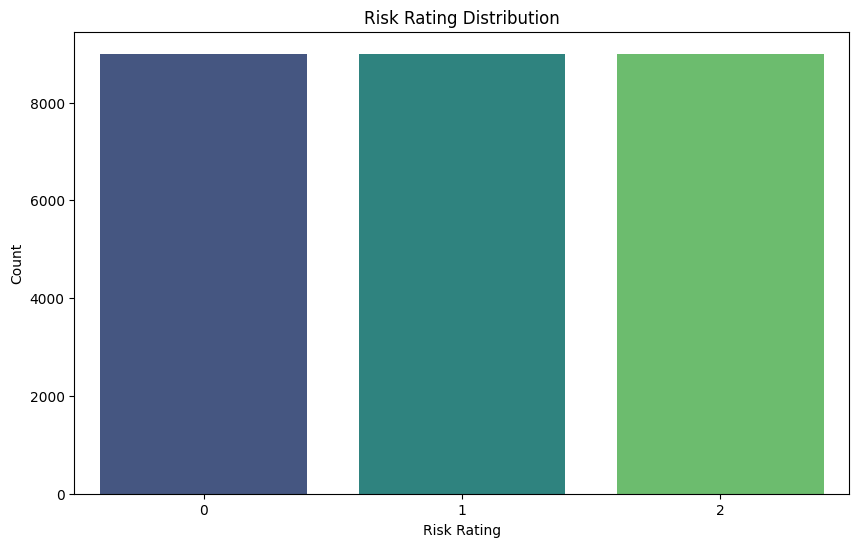

In [ ]:
# Plotting the balanced data
plt.figure(figsize=(10, 6))
sns.countplot(x='Risk Rating', data=data_resampled, palette='viridis')
plt.title('Risk Rating Distribution')
plt.xlabel('Risk Rating')
plt.ylabel('Count')
plt.show()

Look! I successfully balanced the dataset using an oversampling technique. This process involved increasing the number of samples in the minority classes to match the majority class, ensuring an equal distribution across all classes. As a result, the improved data balance will enhance the performance and reliability of my machine learning models.

## Visualize data distribution

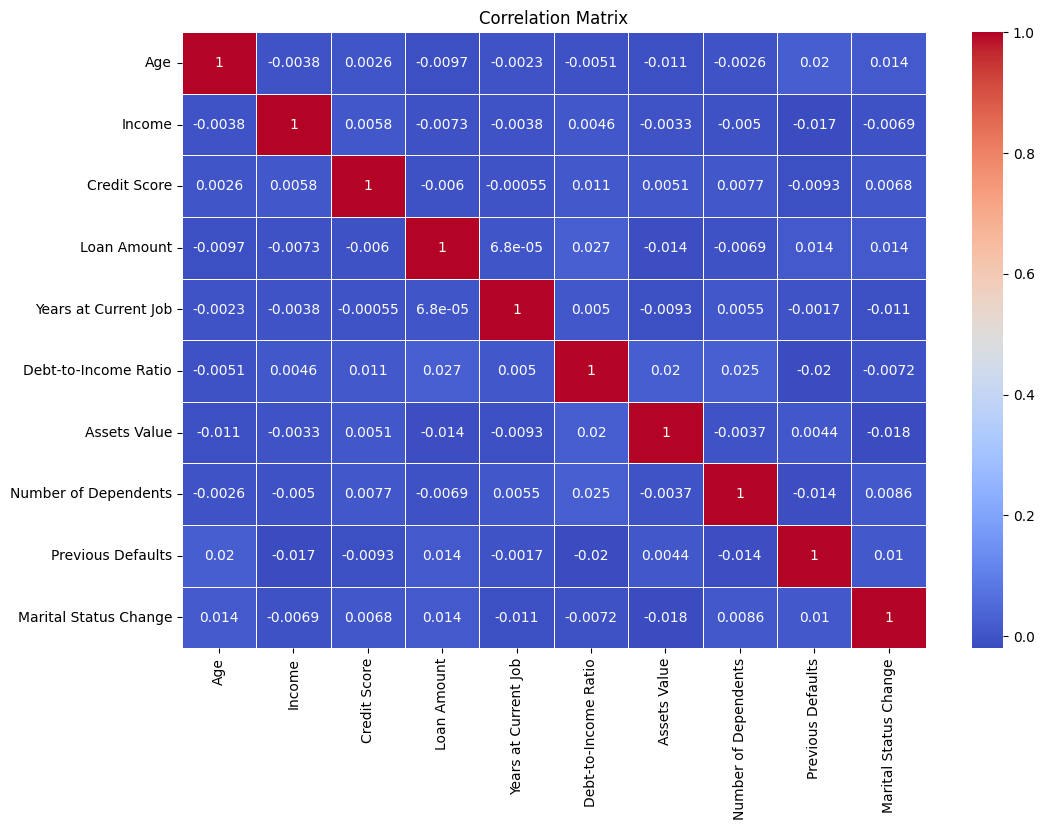

In [ ]:
# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.select_dtypes(['float64','int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### ML

In [ ]:
data_resampled.head()

Age  Gender  Education Level  Marital Status    Income  Credit Score  \
0   49       1                3               0   72799.0         688.0   
1   21       2                2               2   55687.0         600.0   
2   59       1                0               2   26508.0         622.0   
3   42       2                2               2  116212.0         707.0   
4   55       1                1               1   70978.0         706.0   

   Loan Amount  Loan Purpose  Employment Status  Years at Current Job  \
0      45713.0             1                  2                    19   
1      36623.0             2                  0                     8   
2      26541.0             3                  2                     2   
3      24771.0             2                  0                    11   
4      36970.0             3                  2                    19   

   Payment History  Debt-to-Income Ratio  Assets Value  Number of Dependents  \
0                3              0.154313      120228.0                   0.0   
1                1              0.362398      180700.0                   3.0   
2                0              0.454964      157319.0                   3.0   
3                0              0.114134      212198.0                   3.0   
4                0              0.266941       54041.0                   3.0   

   City  State  Country  Previous Defaults  Marital Status Change  Risk Rating  
0  3233      3       55                2.0                      2            1  
1  4076     41      125                3.0                      2            2  
2  3571     44      226                4.0                      2            2  
3  2144     35       73                0.0                      2            2  
4   438     28      219                1.0                      0            2

Lets make a copy of sampled dataset before applying scaling.

In [ ]:
df = data_resampled.copy()

In [ ]:
rfc = RandomForestClassifier(n_estimators = 300 , random_state=42)
svc = SVC(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
lgr = LogisticRegression(solver='newton-cg',random_state=42)
dt  = DecisionTreeClassifier(splitter='random',criterion='entropy',max_depth=5)
knn = KNeighborsClassifier(n_neighbors=5)

models = [rfc, svc, gbc, lgr,dt, knn]

names = ["Random Forest", "Support Vector Machine",
        "Gradient Boostng", "Logistic Regression","Decision Tree Classifier","K Neighbors Classifier"]

In [ ]:
x = data_resampled.drop('Risk Rating', axis=1)
y = data_resampled['Risk Rating']
X_train, X_test, y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Lets create a function to evaluate different models in different way.

In [ ]:
def evaluate_models(X_train, y_train, X_test, y_test, models, names):
    ac = []

    for index, model in enumerate(models):
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        ac.append(accuracy)
        print(f'{names[index]} accuracy: {round(accuracy,4)}')
        print(classification_report(y_test, pred))

    acc_df = pd.DataFrame({'Model': names, 'Accuracy': ac})

    # Convert accuracy to percentage
    acc_df['Accuracy'] = acc_df['Accuracy'] * 100

    # Create horizontal bar plot
    fig, ax = plt.subplots()
    ax.barh(acc_df['Model'], acc_df['Accuracy'], color='brown')

    for index, value in enumerate(acc_df['Accuracy']):
        ax.text(value, index, f'{value:.2f}%', va='center')

    # Set titles and labels
    ax.set_title('Model Accuracy')
    ax.set_xlabel('Accuracy (%)')
    ax.set_ylabel('Model')

    plt.show()


Random Forest accuracy: 0.6804
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1792
           1       0.60      0.86      0.71      1803
           2       0.71      0.37      0.49      1805

    accuracy                           0.68      5400
   macro avg       0.69      0.68      0.66      5400
weighted avg       0.69      0.68      0.66      5400

Support Vector Machine accuracy: 0.3404
              precision    recall  f1-score   support

           0       0.34      0.56      0.43      1792
           1       0.32      0.09      0.14      1803
           2       0.34      0.37      0.35      1805

    accuracy                           0.34      5400
   macro avg       0.34      0.34      0.31      5400
weighted avg       0.34      0.34      0.31      5400

Gradient Boostng accuracy: 0.5985
              precision    recall  f1-score   support

           0       0.65      0.73      0.68      1792
           1       0.58 

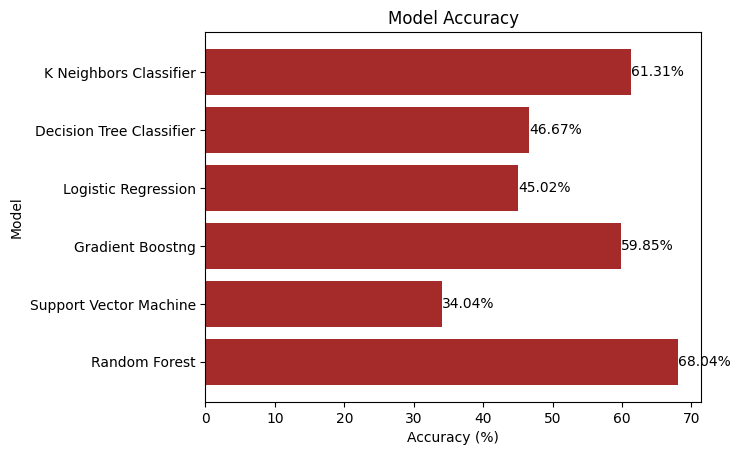

In [ ]:
evaluate_models(X_train, y_train, X_test, y_test, models, names)

## Standard Scaling

In [ ]:
scaler = StandardScaler()

#Apply scalingcal_features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
# Display the scaled features
print(df[numerical_features].head())


        Age    Income  Credit Score  Loan Amount  Years at Current Job  \
0  0.409711  0.104586     -0.231931     1.530535              1.808121   
1  0.990625 -0.008737     -0.190932     0.520752             -0.625821   
2 -1.623488 -0.536254     -2.035903     0.757768             -0.251369   
3  1.135854 -1.629002     -1.584910    -0.099332             -1.374726   
4 -1.333031 -0.770690      1.367044     0.749692              0.123084   

   Debt-to-Income Ratio  Assets Value  Number of Dependents  \
0             -1.476233     -0.543562             -1.682043   
1             -1.516934     -1.420055             -1.682043   
2              0.093998      0.279738              0.809513   
3              0.792514     -0.038584              0.809513   
4             -1.559775      1.728873             -0.021005   

   Previous Defaults  Marital Status Change  
0           0.005886               1.477296  
1           0.839067               1.477296  
2           0.839067               1.4

In [ ]:
x = df.drop('Risk Rating', axis=1)
y = df['Risk Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Random Forest accuracy: 0.6798
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1792
           1       0.60      0.86      0.71      1803
           2       0.70      0.37      0.49      1805

    accuracy                           0.68      5400
   macro avg       0.69      0.68      0.66      5400
weighted avg       0.69      0.68      0.66      5400

Support Vector Machine accuracy: 0.352
              precision    recall  f1-score   support

           0       0.35      0.60      0.45      1792
           1       0.38      0.21      0.27      1803
           2       0.32      0.25      0.28      1805

    accuracy                           0.35      5400
   macro avg       0.35      0.35      0.33      5400
weighted avg       0.35      0.35      0.33      5400

Gradient Boostng accuracy: 0.5985
              precision    recall  f1-score   support

           0       0.65      0.73      0.68      1792
           1       0.58  

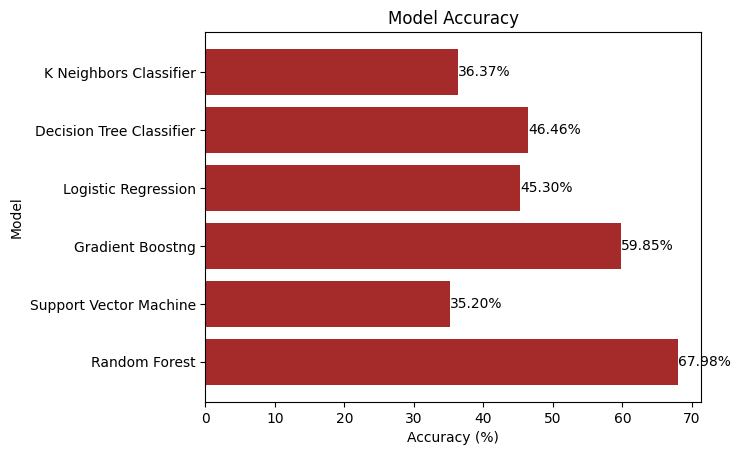

In [ ]:
evaluate_models(X_train, y_train, X_test, y_test, models, names)

"We can observe that the accuracy of  KNN classifier has decresed from 61.36% to 36.37% after scaling. rest all classifier not much changed   and thi swas done  before performing feature selection.

# Feature selection


### SelectKbest-Filter Method

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [ ]:
X_categorical = df[categorical_features]
X_numerical = df[numerical_features]

# Chi-squared test for categorical features
chi_selector = SelectKBest(chi2, k=5)  # Adjust k as needed
X_chi = chi_selector.fit_transform(X_categorical, y)
chi_selected_features = X_categorical.columns[chi_selector.get_support()]

# ANOVA for numerical features
f_selector = SelectKBest(f_classif, k=5)
X_f = f_selector.fit_transform(X_numerical, y)
f_selected_features = X_numerical.columns[f_selector.get_support()]

print("Chi-squared selected features:", chi_selected_features)
print("ANOVA selected features:", f_selected_features)

Chi-squared selected features: Index(['Gender', 'Education Level', 'Employment Status', 'City',
       'Risk Rating'],
      dtype='object')
ANOVA selected features: Index(['Age', 'Income', 'Loan Amount', 'Assets Value',
       'Marital Status Change'],
      dtype='object')


In [ ]:
combined_features = pd.Index(chi_selected_features).union(pd.Index(f_selected_features))
df[combined_features].head()

Age  Assets Value  City  Education Level  Employment Status  Gender  \
0  0.409711     -0.543562  7200                3                  2       1   
1  0.990625     -1.420055  6077                0                  0       0   
2 -1.623488      0.279738  9019                2                  0       2   
3  1.135854     -0.038584  7946                0                  2       1   
4 -1.333031      1.728873  5417                0                  2       2   

     Income  Loan Amount  Marital Status Change  Risk Rating  
0  0.104586     1.530535               1.477296            1  
1 -0.008737     0.520752               1.477296            2  
2 -0.536254     0.757768               1.477296            2  
3 -1.629002    -0.099332               1.477296            2  
4 -0.770690     0.749692               0.176181            1

Visualizing relationships of selected features


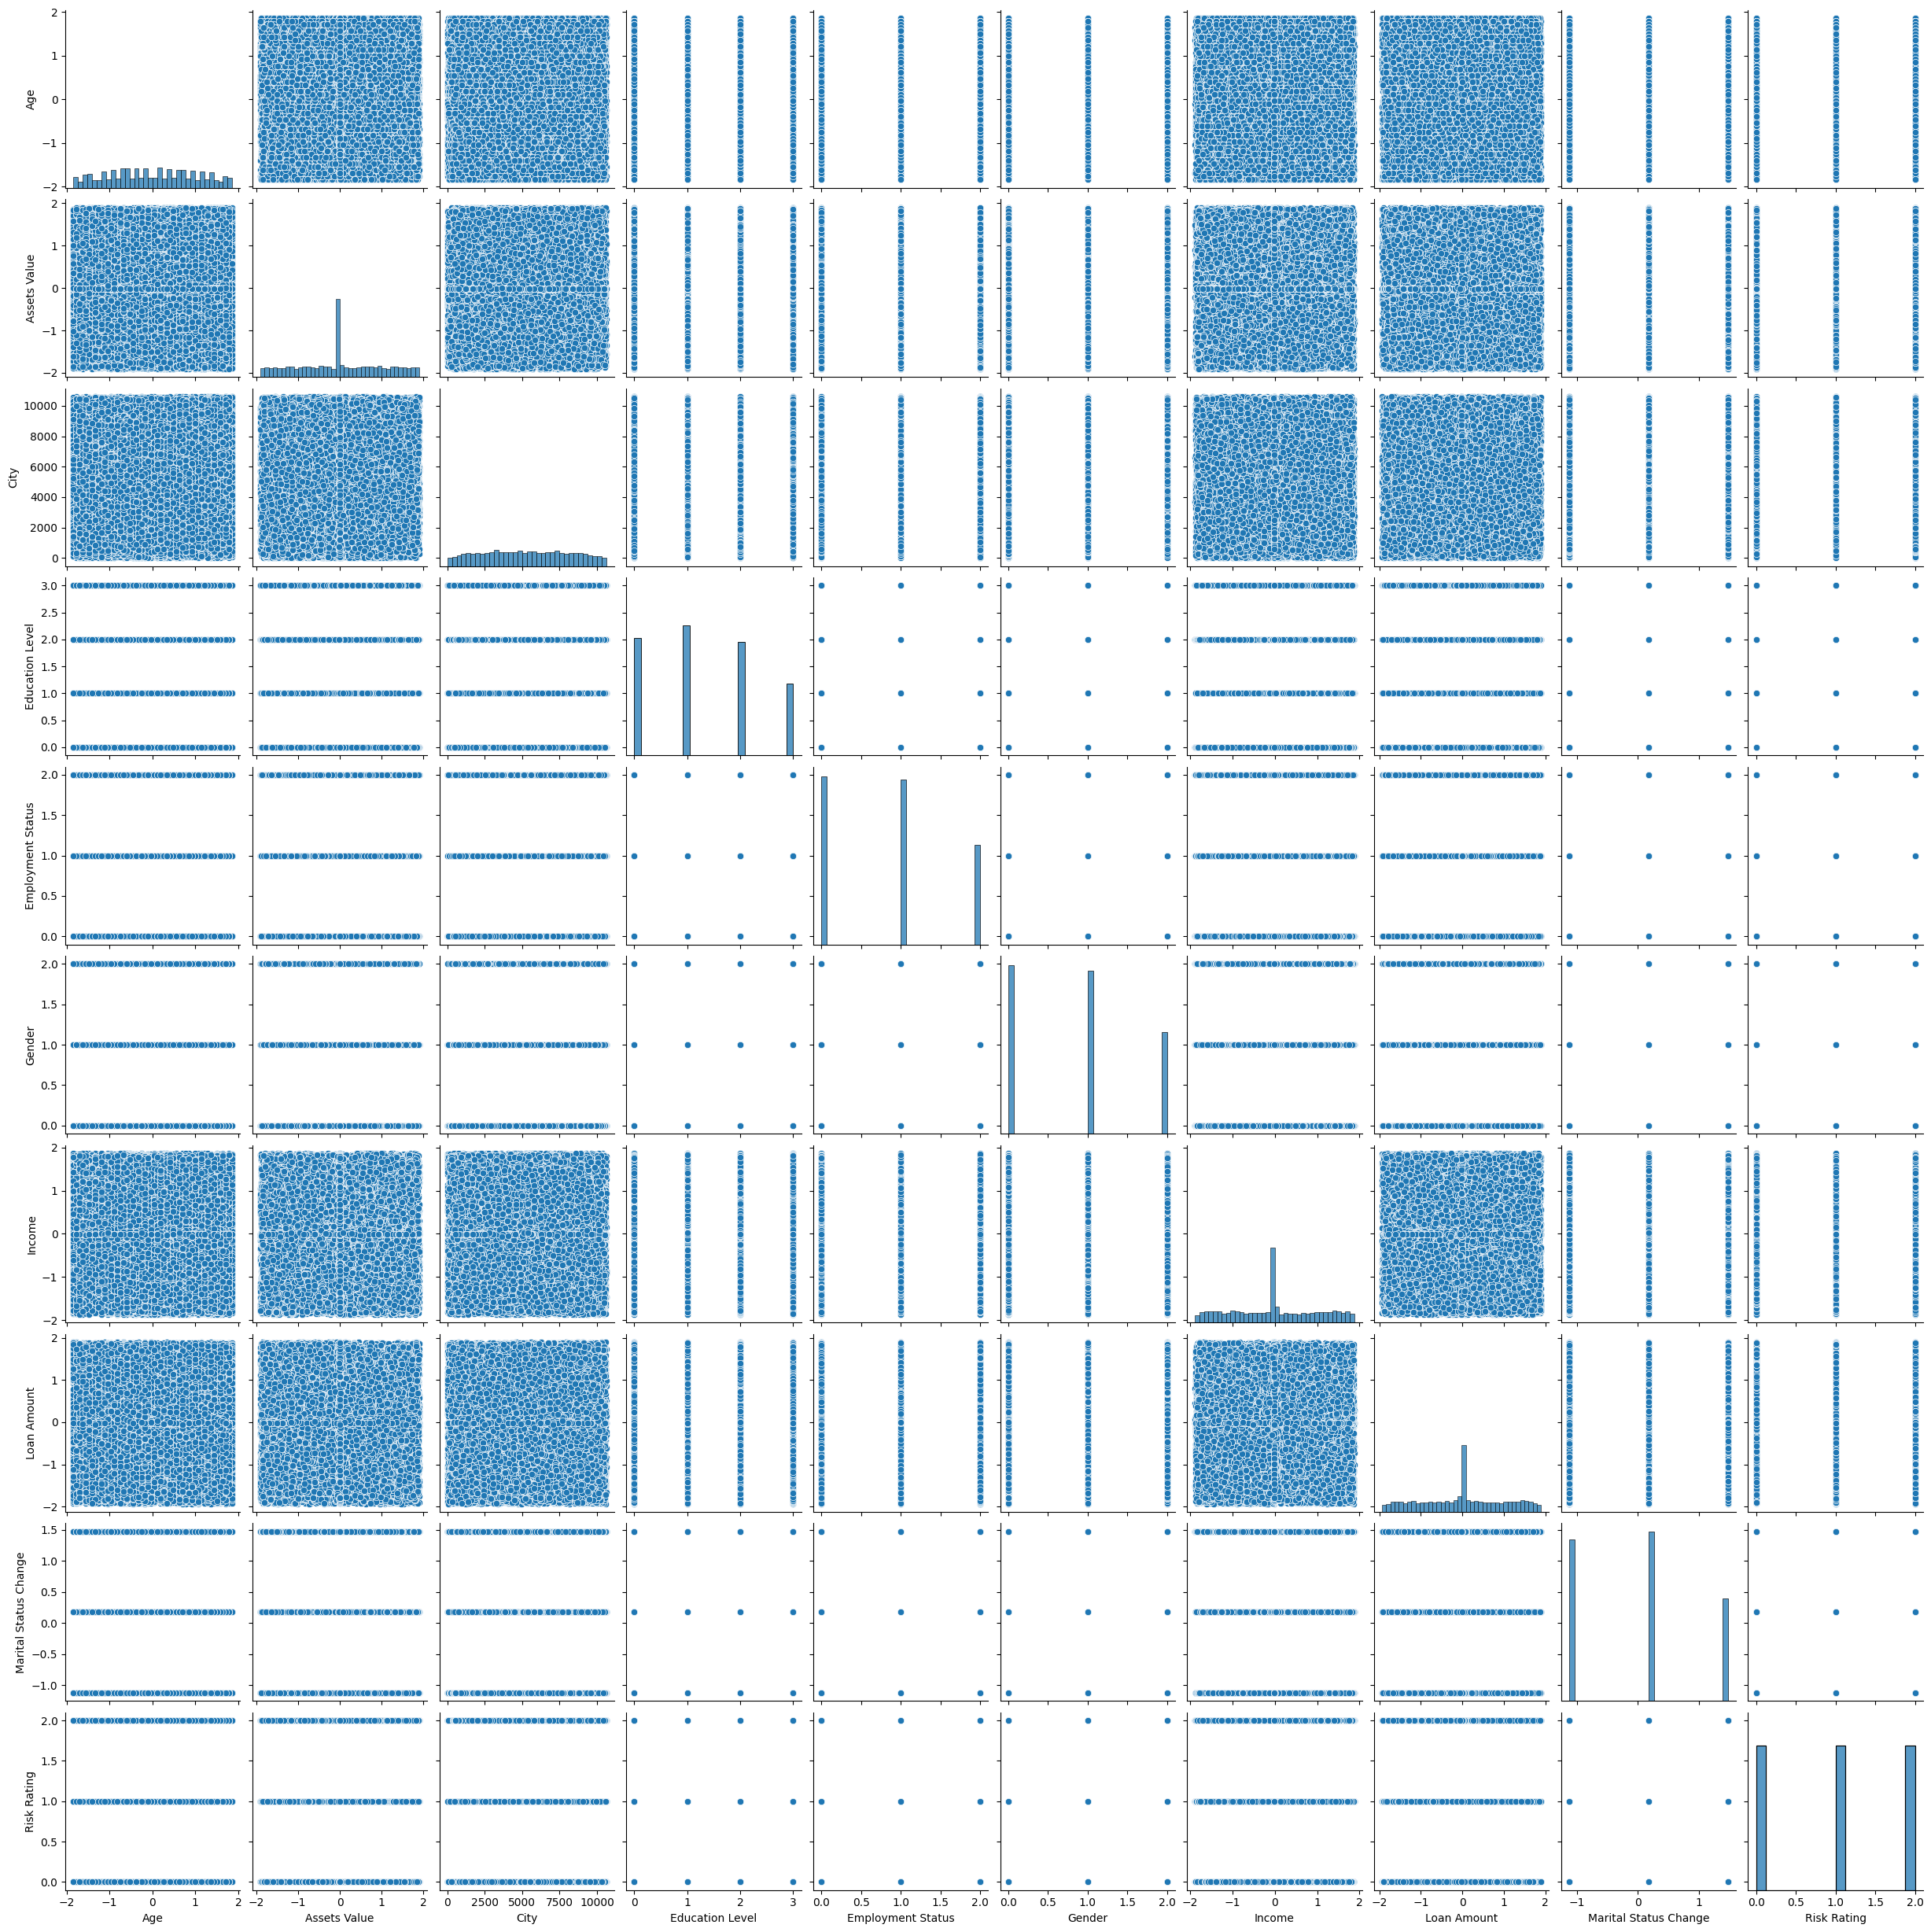

In [ ]:
sns.pairplot(df[combined_features])
plt.show()

In [ ]:
x = df[combined_features].drop('Risk Rating', axis=1)
y = df['Risk Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

0        1
1        2
2        2
3        2
4        1
        ..
26995    2
26996    2
26997    2
26998    2
26999    2
Name: Risk Rating, Length: 27000, dtype: int32

Random Forest accuracy: 0.6798
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1792
           1       0.60      0.86      0.71      1803
           2       0.70      0.37      0.49      1805

    accuracy                           0.68      5400
   macro avg       0.69      0.68      0.66      5400
weighted avg       0.69      0.68      0.66      5400

Support Vector Machine accuracy: 0.352
              precision    recall  f1-score   support

           0       0.35      0.60      0.45      1792
           1       0.38      0.21      0.27      1803
           2       0.32      0.25      0.28      1805

    accuracy                           0.35      5400
   macro avg       0.35      0.35      0.33      5400
weighted avg       0.35      0.35      0.33      5400

Gradient Boostng accuracy: 0.5985
              precision    recall  f1-score   support

           0       0.65      0.73      0.68      1792
           1       0.58  

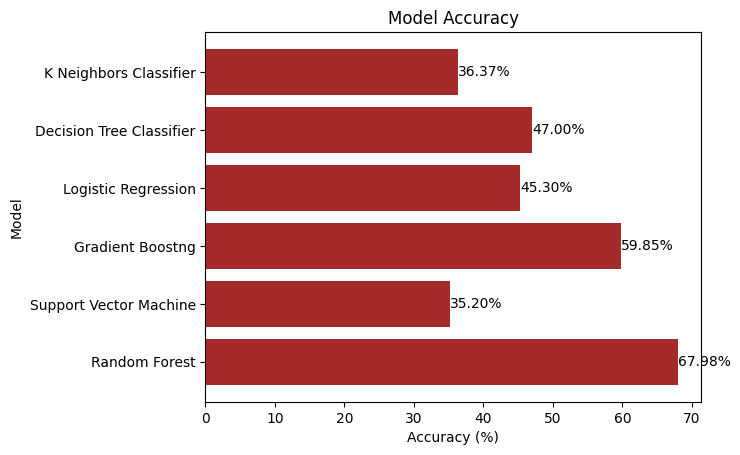

In [ ]:
evaluate_models(X_train, y_train, X_test, y_test, models, names)

### Wrapper Method: Recursive Feature Elimination (RFE)

In [ ]:
model = LogisticRegression()
X_train, X_test, y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# Create RFE object
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
fit = rfe.fit(X_train, y_train)

# Extract the mask of selected features
selected_features = fit.support_

# Transform the dataset to keep only the selected features
X_train_selected = X_train.loc[:, selected_features]
X_test_selected = X_test.loc[:, selected_features]  # Apply the same transformation to the test set



Random Forest accuracy: 0.4628
              precision    recall  f1-score   support

           0       0.47      0.59      0.52      1792
           1       0.49      0.59      0.54      1803
           2       0.38      0.21      0.27      1805

    accuracy                           0.46      5400
   macro avg       0.45      0.46      0.44      5400
weighted avg       0.45      0.46      0.44      5400

Support Vector Machine accuracy: 0.472
              precision    recall  f1-score   support

           0       0.48      0.64      0.55      1792
           1       0.48      0.73      0.57      1803
           2       0.36      0.05      0.10      1805

    accuracy                           0.47      5400
   macro avg       0.44      0.47      0.41      5400
weighted avg       0.44      0.47      0.41      5400

Gradient Boostng accuracy: 0.4693
              precision    recall  f1-score   support

           0       0.48      0.64      0.55      1792
           1       0.49  

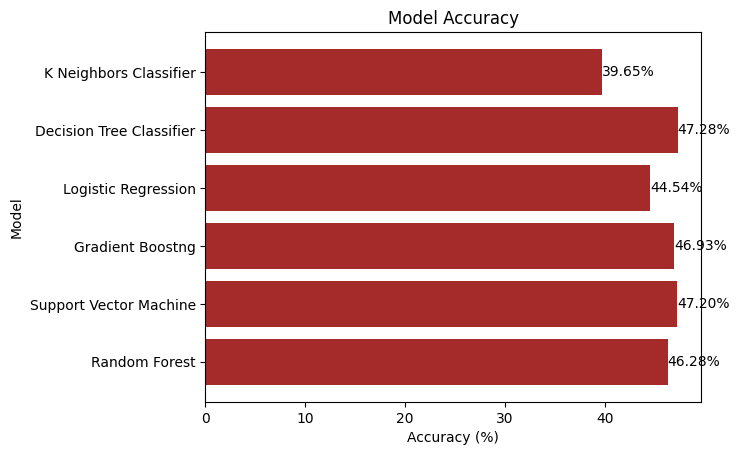

In [ ]:
evaluate_models(X_train_selected, y_train, X_test_selected, y_test, models, names)

After feature selection using the wrapper method, the accuracy for logistic regression, K neighbors, Dcision Tree and SVM increased, but the accuracy for gradient boosting and random forest decreased.


Embedded Method: Random Forest Feature Importance

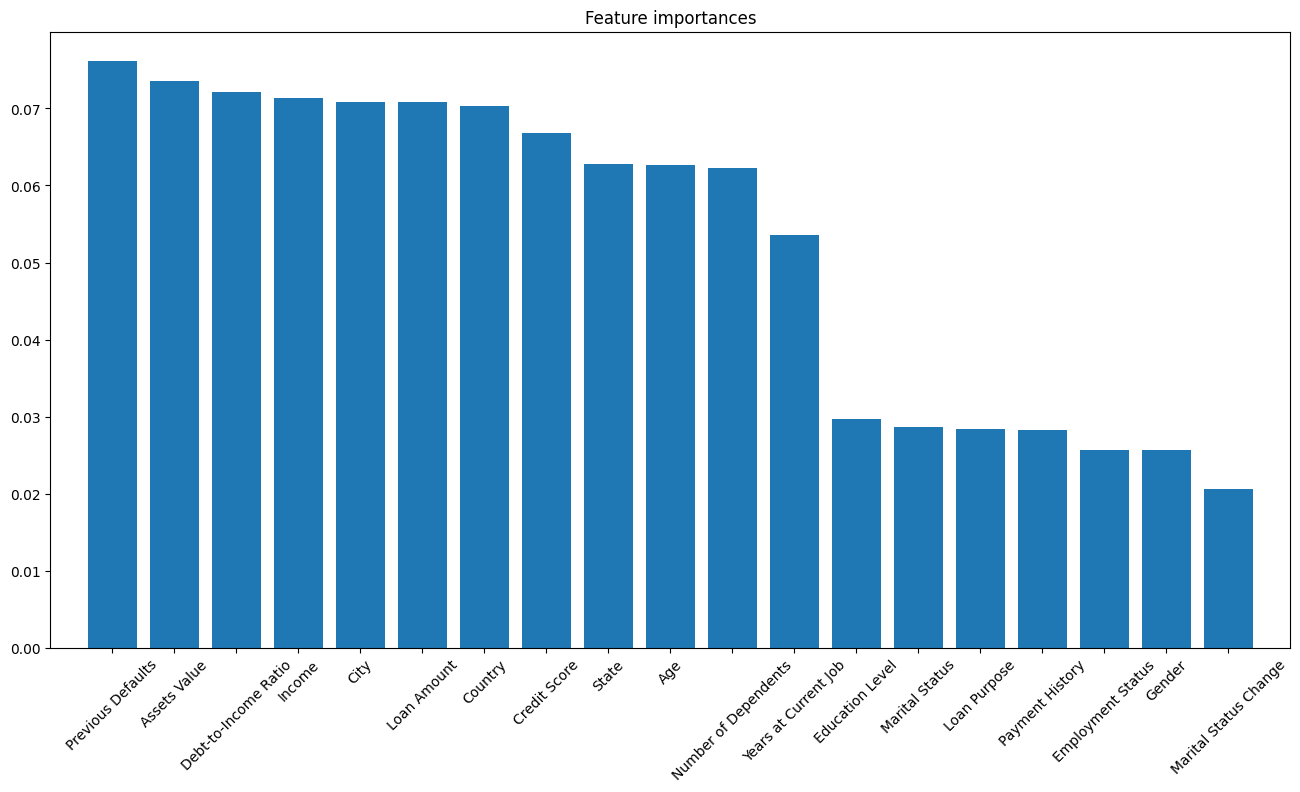

In [ ]:
# Create a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(16,8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()


From the above graph we can visualize that first 12 features are more dependent than others. so we can drop other columns and build the model

In [ ]:
#Select the top 12 features
top_12_features = X_train.columns[indices[:12]]

df[top_12_features].head()

Previous Defaults  Assets Value  Debt-to-Income Ratio    Income  City  \
0           0.005886     -0.543562             -1.476233  0.104586  7200   
1           0.839067     -1.420055             -1.516934 -0.008737  6077   
2           0.839067      0.279738              0.093998 -0.536254  9019   
3           1.672248     -0.038584              0.792514 -1.629002  7946   
4           0.839067      1.728873             -1.559775 -0.770690  5417   

   Loan Amount  Country  Credit Score  State       Age  Number of Dependents  \
0     1.530535       55     -0.231931      3  0.409711             -1.682043   
1     0.520752      223     -0.190932     40  0.990625             -1.682043   
2     0.757768      125     -2.035903     41 -1.623488              0.809513   
3    -0.099332      226     -1.584910     44  1.135854              0.809513   
4     0.749692      148      1.367044     17 -1.333031             -0.021005   

   Years at Current Job  
0              1.808121  
1             -0.625821  
2             -0.251369  
3             -1.374726  
4              0.123084

In [ ]:
X = df[top_12_features]
y = df['Risk Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest accuracy: 0.6887
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1792
           1       0.61      0.91      0.73      1803
           2       0.73      0.34      0.47      1805

    accuracy                           0.69      5400
   macro avg       0.71      0.69      0.67      5400
weighted avg       0.71      0.69      0.66      5400

Support Vector Machine accuracy: 0.3507
              precision    recall  f1-score   support

           0       0.35      0.61      0.45      1792
           1       0.38      0.20      0.26      1803
           2       0.32      0.25      0.28      1805

    accuracy                           0.35      5400
   macro avg       0.35      0.35      0.33      5400
weighted avg       0.35      0.35      0.33      5400

Gradient Boostng accuracy: 0.6013
              precision    recall  f1-score   support

           0       0.65      0.71      0.68      1792
           1       0.58 

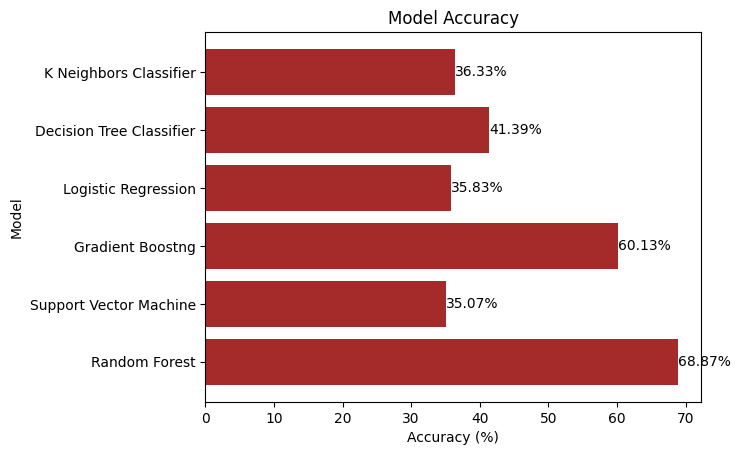

In [ ]:
evaluate_models(X_train, y_train, X_test, y_test, models, names)

After using feature selection only the model using Random forest and Gradient Boosting are slightly increased rest all models as decreased in its accuracy.

## Cross validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt=DecisionTreeClassifier()
cv_scores = cross_val_score(dt, X_resampled, y_resampled, cv=5 , scoring='accuracy')
print(cv_scores)
print(cv_scores.mean())

[0.41166667 0.5262963  0.55814815 0.5787037  0.57259259]
0.5294814814814814


* The mean accuracy across the 5 folds is approximately 53.89%.
* The accuracy scores vary between 39.89% and 59.63%. This suggests some variability in the model's performance across different subsets of the data.

* So we can conclude that Random Forest classifier is the better model when compared to other with 68.70% accuracy followed by Gradient Boosting with accuracy of 60.13%.
* SVM model accuracy 47.20% and logistic regression 44.54% by wrapper method.
* Decision Tree classifier 53.89%

## By dropping null values

In [ ]:
data_copy1.dropna(axis=0,inplace=True)
#Lets call the function created for label encoding
encoded_data_copy1, label_encoders = encode_categorical_features(data_copy1, categorical_features)

X = encoded_data_copy1.drop('Risk Rating',axis =1)
y = encoded_data_copy1['Risk Rating']

In [ ]:
#Balancing the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Random Forest accuracy: 0.7036
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       702
           1       0.61      0.83      0.71       679
           2       0.71      0.46      0.56       674

    accuracy                           0.70      2055
   macro avg       0.71      0.70      0.69      2055
weighted avg       0.71      0.70      0.70      2055

Support Vector Machine accuracy: 0.3552
              precision    recall  f1-score   support

           0       0.35      0.31      0.33       702
           1       0.35      0.31      0.33       679
           2       0.36      0.45      0.40       674

    accuracy                           0.36      2055
   macro avg       0.35      0.36      0.35      2055
weighted avg       0.35      0.36      0.35      2055

Gradient Boostng accuracy: 0.6058
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       702
           1       0.58 

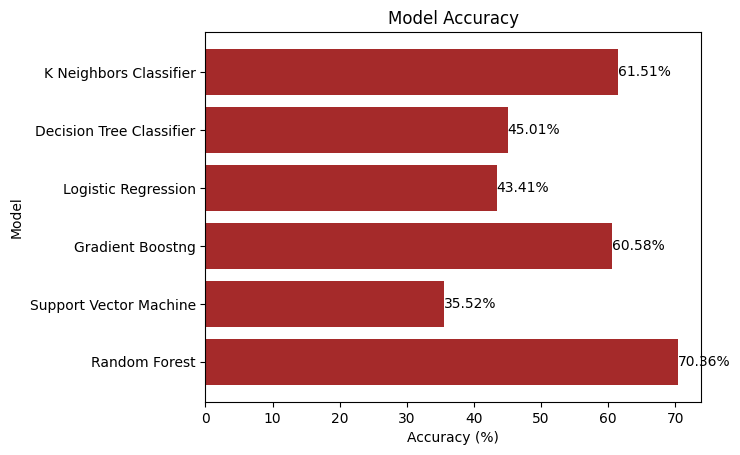

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
evaluate_models(X_train, y_train, X_test, y_test, models, names)




Summary

Performing Model: The Random Forest model performs the best, with an accuracy of 0.7036 and relatively strong performance across all classes, particularly Class 0.

Challenges: SVM and Logistic Regression both have low accuracy and F1-scores, suggesting they may not be well-suited for this balanced dataset. Gradient Boosting: Offers a reasonable alternative, though it underperforms on Class 2.


## Confusion matrix

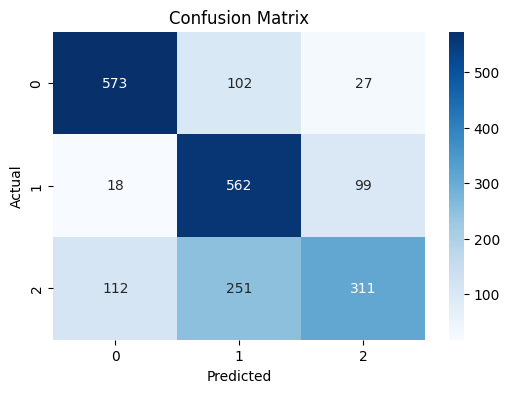

In [ ]:
y_pred = rfc.predict(X_test)
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Insights:

Class 0 is predicted with relatively high accuracy, but there are still notable misclassifications with Class 1.
Class 1 also shows strong accuracy but has a higher tendency to be confused with Class 2.
Class 2 is the most challenging class for the model to predict correctly, with a high number of misclassifications, particularly with Class 1.

# Receiver Operating Characteristic (ROC) Curve

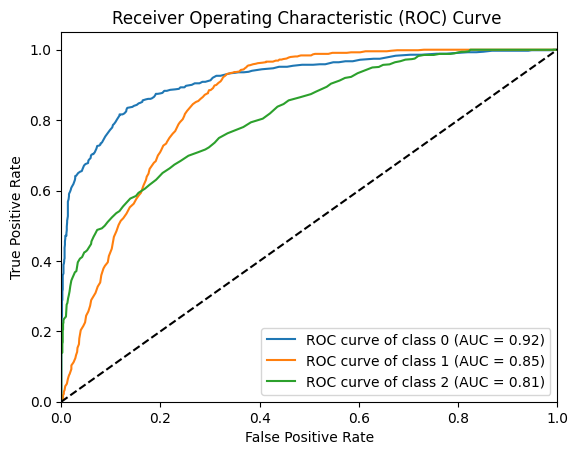

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Predict probabilities
y_pred_proba = rfc.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve ')
plt.legend(loc="lower right")
plt.show()


### Area Under the ROC curve (AUC)

The model performs very well in distinguishing Class 0 from the other classes. An AUC of 0.92 indicates that there’s a 92% chance that the model will correctly distinguish between a randomly chosen positive instance of Class 0 and a randomly chosen instance from another class.
Overall: The high AUC aligns with the relatively strong performance of the model for Class 0, as reflected in the confusion matrix.

The model is fairly good at distinguishing Class 1 from other classes, with an AUC of 0.85. While this is still a strong value, it indicates slightly lower performance compared to Class 0.

The model has the most difficulty distinguishing Class 2 from the other classes, as indicated by the AUC of 0.81.

## Test with unseen data

In [ ]:

# Create the test input as a dictionary with  data types
test_input_dict = {
    'Age': [48],                              # int
    'Gender': ['Male'],                       # object
    'Education Level': ['phd'],               # object
    'Marital Status': ['widowed'],            # object
    'Income': [70000.0],                      # float
    'Credit Score': [700.0],                  # float
    'Loan Amount': [50000.0],                 # float
    'Loan Purpose': ['Auto'],                 # object
    'Employment Status': ['Employed'],        # object
    'Years at Current Job': [15],             # int
    'Payment History': ['Poor'],              # object
    'Debt-to-Income Ratio': [0.166666],       # float
    'Assets Value': [111000.0],               # float
    'Number of Dependents': [2.0],            # float
    'City': ['Robinhaven'],                   # object
    'State': ['PR'],                          # object
    'Country': ['Uganda'],                    # object
    'Previous Defaults': [2.0],               # float
    'Marital Status Change': [1]              # int
}

# Convert the dictionary to a Pandas DataFrame
test_input_df = pd.DataFrame(test_input_dict)

# Display the data types of each column
print(test_input_df.dtypes)


Age                        int64
Gender                    object
Education Level           object
Marital Status            object
Income                   float64
Credit Score             float64
Loan Amount              float64
Loan Purpose              object
Employment Status         object
Years at Current Job       int64
Payment History           object
Debt-to-Income Ratio     float64
Assets Value             float64
Number of Dependents     float64
City                      object
State                     object
Country                   object
Previous Defaults        float64
Marital Status Change      int64
dtype: object


In [ ]:
test_input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1 non-null      int64  
 1   Gender                 1 non-null      object 
 2   Education Level        1 non-null      object 
 3   Marital Status         1 non-null      object 
 4   Income                 1 non-null      float64
 5   Credit Score           1 non-null      float64
 6   Loan Amount            1 non-null      float64
 7   Loan Purpose           1 non-null      object 
 8   Employment Status      1 non-null      object 
 9   Years at Current Job   1 non-null      int64  
 10  Payment History        1 non-null      object 
 11  Debt-to-Income Ratio   1 non-null      float64
 12  Assets Value           1 non-null      float64
 13  Number of Dependents   1 non-null      float64
 14  City                   1 non-null      object 
 15  State     

In [ ]:
cat_features = test_input_df.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
cat_features

['Gender',
 'Education Level',
 'Marital Status',
 'Loan Purpose',
 'Employment Status',
 'Payment History',
 'City',
 'State',
 'Country']

Encoding categorical features

In [ ]:
# Define a dictionary of custom mappings for categorical features
custom_mappings = {
    'Gender': {'Male': 1},
    'Education Level': {'phd': 3},
    'Marital Status': {'widowed': 3},
    'Loan Purpose': {'Auto': 2},
    'Employment Status': {'Employed': 0},
    'Payment History': {'Poor': 3},
    'City': {'Robinhaven': 7946},
    'State': {'PR': 44},
    'Country': {'Uganda': 226}
}

# Apply the mappings using .replace() for each categorical column
for col, mapping in custom_mappings.items():
    test_input_df[col] = test_input_df[col].replace(mapping)

# Display the modified DataFrame
test_input_df

Age  Gender  Education Level  Marital Status   Income  Credit Score  \
0   48       1                3               3  70000.0         700.0   

   Loan Amount  Loan Purpose  Employment Status  Years at Current Job  \
0      50000.0             2                  0                    15   

   Payment History  Debt-to-Income Ratio  Assets Value  Number of Dependents  \
0                3              0.166666      111000.0                   2.0   

   City  State  Country  Previous Defaults  Marital Status Change  
0  7946     44      226                2.0                      1

In [ ]:
y_pred = rfc.predict(test_input_df)

In [ ]:
y_pred

array([1])

So... The model has assessed the provided input data and classified the individual as having a medium risk.

# Save model

In [ ]:
from joblib import dump, load

# Save the trained model
dump(rfc, '/content/classifier.joblib')

# Load the saved model
loaded_rfc = load('/content/classifier.joblib')


Predicting the trained data using saved model...

In [ ]:
y_predi=loaded_rfc.predict(test_input_df)

In [ ]:
y_predi

array([1])